In [225]:
import pandas as pd

# Read in Hall of Fame dataset

hof_url = 'https://raw.githubusercontent.com/thomasj-s/thomasj-s.github.io/master/HallOfFame.csv'
hof = pd.read_csv(hof_url)
hof.head(5)

playerID  yearid votedBy  ballots  ...  votes  inducted category needed_note
0   cobbty01    1936   BBWAA    226.0  ...  222.0         Y   Player         NaN
1   ruthba01    1936   BBWAA    226.0  ...  215.0         Y   Player         NaN
2  wagneho01    1936   BBWAA    226.0  ...  215.0         Y   Player         NaN
3  mathech01    1936   BBWAA    226.0  ...  205.0         Y   Player         NaN
4  johnswa01    1936   BBWAA    226.0  ...  189.0         Y   Player         NaN

[5 rows x 9 columns]

In [4]:
# Check which columns have null and hof shape

hof.isnull().sum(), hof.shape

(playerID          0
 yearid            0
 votedBy           0
 ballots         193
 needed          350
 votes           193
 inducted          0
 category          0
 needed_note    3963
 dtype: int64, (4120, 9))

In [5]:
# Drop 'needed_note' column, then drop rows with missing data.
# We drop 'needed_note' column first so that when we apply .dropna,
# we don't drop 3963 rows.

hof = hof.drop(columns='needed_note')
hof = hof.dropna(axis=0, how='any')
hof.shape

(3770, 8)

In [6]:
# Create list with unique player values for reference on how long
# our final 'first ballot' dataset list should be.

hof_names = list(hof['playerID'].unique())
len(hof_names)

1151

In [7]:
# Use drop_duplicates to drop rows where a players name has appeared
# a second, third, fourth etc. time.  This ensures that our list is 
# comprised of only first ballot entries. We confirm this by checking the
# shape against the list in the previous cell of unique values.


hof = hof.drop_duplicates(subset='playerID', keep='first')
hof.shape

(1151, 8)

In [8]:
# Check distribution of our target value, 'Inducted'

hof['inducted'].value_counts(normalize=True)

N    0.95656
Y    0.04344
Name: inducted, dtype: float64

In [9]:
# ----------  Our hall of fame dataset is clean and ready for use in extracting  --------
# ----------  batting stats for first time ballot players.          --------

In [10]:
# Our tagret is the 'yes' class of the 'inducted' column.  Choosing an 
# evaluation metric for this is difficult as we have very unbalanced classes.

# We will lean toward precision and f-score.  

# Our baseline precision to beat is 95%.  Yikes.

In [226]:
# Load in / preview 'Batting' dataset

batting_url = 'https://raw.githubusercontent.com/thomasj-s/thomasj-s.github.io/master/Batting.csv'
batting = pd.read_csv(batting_url)
batting.head()

playerID  yearID  stint teamID lgID   G  ...   SO  IBB  HBP  SH  SF  GIDP
0  abercda01    1871      1    TRO  NaN   1  ...  0.0  NaN  NaN NaN NaN   NaN
1   addybo01    1871      1    RC1  NaN  25  ...  0.0  NaN  NaN NaN NaN   NaN
2  allisar01    1871      1    CL1  NaN  29  ...  5.0  NaN  NaN NaN NaN   NaN
3  allisdo01    1871      1    WS3  NaN  27  ...  2.0  NaN  NaN NaN NaN   NaN
4  ansonca01    1871      1    RC1  NaN  25  ...  1.0  NaN  NaN NaN NaN   NaN

[5 rows x 22 columns]

In [12]:
# Check for null

batting.isnull().sum(), batting.shape


(playerID        0
 yearID          0
 stint           0
 teamID          0
 lgID          737
 G               0
 AB           5149
 R            5149
 H            5149
 2B           5149
 3B           5149
 HR           5149
 RBI          5573
 SB           6449
 CS          28603
 BB           5149
 SO          12987
 IBB         41712
 HBP          7959
 SH          11487
 SF          41181
 GIDP        31257
 dtype: int64, (101332, 22))

In [13]:
# Before imputing or dropping any data, lets reduce our data set to only the stats
# of players who were inducted into the hall of fame.  This will give us 
# a better picture of how much missing data we will actually be dealing with.

hof_batting = [[]]

for x in hof_names:
  for y in batting.index:
    if x == batting['playerID'][y]:
      hof_batting.append(batting.iloc[y])

hof_batting = pd.DataFrame(hof_batting)
hof_batting.head()


0       1    2     3     4      5   ...  16  17   18    19  20  21
0      None     NaN  NaN  None  None    NaN  ... NaN NaN  NaN   NaN NaN NaN
1  cobbty01  1905.0  1.0   DET    AL   41.0  ... NaN NaN  0.0   4.0 NaN NaN
2  cobbty01  1906.0  1.0   DET    AL   98.0  ... NaN NaN  3.0  14.0 NaN NaN
3  cobbty01  1907.0  1.0   DET    AL  150.0  ... NaN NaN  5.0  12.0 NaN NaN
4  cobbty01  1908.0  1.0   DET    AL  150.0  ... NaN NaN  6.0  14.0 NaN NaN

[5 rows x 22 columns]

In [14]:
# Re-assign columns names / drop first row and reset index

hof_batting.columns = batting.columns

In [15]:
hof_batting1 = hof_batting.drop(0)
hof_batting1.reset_index(inplace=True)
hof_batting1.drop(columns='index', inplace=True)
hof_batting1.head()

playerID  yearID  stint teamID lgID      G  ...  SO  IBB  HBP    SH  SF  GIDP
0  cobbty01  1905.0    1.0    DET   AL   41.0  ... NaN  NaN  0.0   4.0 NaN   NaN
1  cobbty01  1906.0    1.0    DET   AL   98.0  ... NaN  NaN  3.0  14.0 NaN   NaN
2  cobbty01  1907.0    1.0    DET   AL  150.0  ... NaN  NaN  5.0  12.0 NaN   NaN
3  cobbty01  1908.0    1.0    DET   AL  150.0  ... NaN  NaN  6.0  14.0 NaN   NaN
4  cobbty01  1909.0    1.0    DET   AL  156.0  ... NaN  NaN  6.0  24.0 NaN   NaN

[5 rows x 22 columns]

In [16]:
# Check for null data

hof_batting1.isnull().sum()

playerID       0
yearID         0
stint          0
teamID         0
lgID          63
G              0
AB           986
R            986
H            986
2B           986
3B           986
HR           986
RBI          993
SB          1155
CS          5188
BB           986
SO          2187
IBB         8027
HBP         1253
SH          1593
SF          7924
GIDP        5874
dtype: int64

In [17]:
# Create a column for batting average

hof_batting1['Avg.'] = hof_batting1['H'] / hof_batting1['AB']

In [18]:
hof_batting1

playerID  yearID  stint teamID lgID  ...  HBP    SH   SF  GIDP      Avg.
0       cobbty01  1905.0    1.0    DET   AL  ...  0.0   4.0  NaN   NaN  0.240000
1       cobbty01  1906.0    1.0    DET   AL  ...  3.0  14.0  NaN   NaN  0.315642
2       cobbty01  1907.0    1.0    DET   AL  ...  5.0  12.0  NaN   NaN  0.350413
3       cobbty01  1908.0    1.0    DET   AL  ...  6.0  14.0  NaN   NaN  0.323580
4       cobbty01  1909.0    1.0    DET   AL  ...  6.0  24.0  NaN   NaN  0.376963
...          ...     ...    ...    ...  ...  ...  ...   ...  ...   ...       ...
18374  lowelmi01  2006.0    1.0    BOS   AL  ...  4.0   0.0  7.0  22.0  0.284468
18375  lowelmi01  2007.0    1.0    BOS   AL  ...  3.0   0.0  8.0  19.0  0.324278
18376  lowelmi01  2008.0    1.0    BOS   AL  ...  5.0   0.0  6.0  14.0  0.274463
18377  lowelmi01  2009.0    1.0    BOS   AL  ...  1.0   0.0  5.0  24.0  0.289888
18378  lowelmi01  2010.0    1.0    BOS   AL  ...  0.0   0.0  3.0   9.0  0.238532

[18379 rows x 23 columns]

In [19]:
# Write function to derive career averages for players with more than
# zero at bats.

def get_average(df, playerID):

  df1 = df[df['playerID'] == playerID]

  if sum(df1['AB']) > 0:
    career_average = sum(df1['H']) / sum(df1['AB'])

  else:
    career_average = 0

  return career_average

In [20]:
# Use our function to get a list of career averages, one for every player in our
# hall of fame player list.

averages = []

for x in hof_names:
  averages.append(get_average(hof_batting1, x))

len(averages)

1151

In [21]:
# Create a new column for career averages

hof['career_average'] = averages
hof.head()

playerID  yearid votedBy  ballots  ...  votes  inducted category career_average
0   cobbty01    1936   BBWAA    226.0  ...  222.0         Y   Player       0.366363
1   ruthba01    1936   BBWAA    226.0  ...  215.0         Y   Player       0.342105
2  wagneho01    1936   BBWAA    226.0  ...  215.0         Y   Player       0.327421
3  mathech01    1936   BBWAA    226.0  ...  205.0         Y   Player       0.214964
4  johnswa01    1936   BBWAA    226.0  ...  189.0         Y   Player       0.235370

[5 rows x 9 columns]

In [22]:
# Our Hall of fame player list includes batters with 0 career at bats, which gave our function
# a difficult time calculating batting averages.  Upon further inspection, we see that 
# pitchers ended up on this list with 0 career at bats, we will drop those with 0
# career average, as our function determines they are a pitcher, or a manager and not
# a position player.

# We drop 176 players with a 0 average.  Lets re-check our targer distribution.

hof = hof[hof['career_average'] > 0]
len(hof), hof['inducted'].value_counts(normalize=True)

(975, N    0.954872
 Y    0.045128
 Name: inducted, dtype: float64)

In [23]:
# Now that we have dropped values from our 'hof' dataset, we have to be sure that
# we drop those same names from the 'hof_names' list, as we are using for loops and our 
# 'hof_names' list to iterate over and create columns for our dataset.  This will not
# work if these two are not the same length and in the same order in terms of 
# player ID.

hof['category'].value_counts()

Player               968
Manager                5
Pioneer/Executive      2
Name: category, dtype: int64

In [24]:
# Drop managers and pioneer / executives from our data.

hof = hof[hof['category'] == 'Player']

In [25]:
# Re-define 'hof_names' list by using our current 'playerID' column
# in the 'hof' dataset.  This keeps them having the same length, order, and
# values.

hof_names = hof['playerID']
len(hof_names)

968

In [227]:
# Read in pitching dataset

pitching_url = 'https://raw.githubusercontent.com/thomasj-s/thomasj-s.github.io/master/Pitching.csv'
pitching = pd.read_csv(pitching_url)
len(pitching)

44139

In [27]:
# Use a similar method as earlier in the notebook to drop duplicates
# from our 'pitching' dataset.  This will speed up our for loops.

pitching.drop_duplicates(subset='playerID', keep='first', inplace=True)
len(pitching)

9126

In [28]:
# Use 'pitching' dataset to filter out players by id who would have not been voted in
# according to their offensive stats, such as batting average.

pitchers_to_drop = [[]]

for x in hof_names:
  for y in pitching.index:
    if pitching['playerID'][y] == x:
      pitchers_to_drop.append(x)

len(pitchers_to_drop)

302

In [29]:
# Seems like some of our position players may appear on our pitchers_to_drop
# list also, not what we want.  Now we have to determine which of our pitchers_to_drop
# should be kept.  Lets use batting average as a way of narrowing down our 
# pitchers_to_drop

actual_pitchers_to_drop = [[]]

for x in pitchers_to_drop:
  for y in hof.index:
    if hof['playerID'][y] == x and hof['career_average'][y] <= .239:
      actual_pitchers_to_drop.append(x)

len(actual_pitchers_to_drop)

198

In [30]:
# Drop players on 'actual_players_to_drop' list from our 'hof' dataset

for x in actual_pitchers_to_drop:
  for y in hof.index:
    if hof['playerID'][y] == x:
      hof = hof.drop(y)

len(hof)

771

In [31]:
# Re-define our 'hof_names' list again.  We will need to do this every time before 
# we use this list to iterate over our data to create stats / features.

hof_names = hof['playerID']

In [32]:
# Write a function to calculate career hits and average # of hits per season.

def get_total_hits(df, playerID):
  df1 = df[df['playerID'] == playerID]
  career_hits = sum(df1['H'])
  return career_hits

def average_hits_per_season(df, playerID):
  df1 = df[df['playerID'] == playerID]
  hits_per_season = sum(df1['H']) / len(df1)
  return hits_per_season

career_hits_list = []
hits_per_season_list = []

for x in hof_names:
  career_hits_list.append(get_total_hits(hof_batting1, x))
  hits_per_season_list.append(average_hits_per_season(hof_batting1, x))

hof['hits_per_season'] = hits_per_season_list
hof['career_hits'] = career_hits_list

hof.head()

playerID  yearid votedBy  ...  career_average  hits_per_season  career_hits
0   cobbty01    1936   BBWAA  ...        0.366363       174.541667       4189.0
1   ruthba01    1936   BBWAA  ...        0.342105       130.590909       2873.0
2  wagneho01    1936   BBWAA  ...        0.327421       162.619048       3415.0
5  lajoina01    1936   BBWAA  ...        0.338096       147.363636       3242.0
6  speaktr01    1936   BBWAA  ...        0.344679       159.727273       3514.0

[5 rows x 11 columns]

In [33]:
# Check again for missing data now that we are nearing a point where we know how much
# we would realisticly have to work with.

# Absolutely beautiful.

hof.isnull().sum()

playerID           0
yearid             0
votedBy            0
ballots            0
needed             0
votes              0
inducted           0
category           0
career_average     0
hits_per_season    0
career_hits        0
dtype: int64

In [34]:
# Create for loop to reduce our 'hof_batting1' dataset to only players in our
# 'hof_names' list to speed up our for loops

hof_batting = [[]]

for x in hof_names:
  for y in hof_batting1.index:
    if hof_batting1['playerID'][y] == x:
      hof_batting.append(hof_batting1.iloc[y])

hof_batting = pd.DataFrame(hof_batting)
hof_batting.head(), len(hof_batting)

(         0       1    2     3     4      5   ...  17   18    19  20  21        22
 0      None     NaN  NaN  None  None    NaN  ... NaN  NaN   NaN NaN NaN       NaN
 1  cobbty01  1905.0  1.0   DET    AL   41.0  ... NaN  0.0   4.0 NaN NaN  0.240000
 2  cobbty01  1906.0  1.0   DET    AL   98.0  ... NaN  3.0  14.0 NaN NaN  0.315642
 3  cobbty01  1907.0  1.0   DET    AL  150.0  ... NaN  5.0  12.0 NaN NaN  0.350413
 4  cobbty01  1908.0  1.0   DET    AL  150.0  ... NaN  6.0  14.0 NaN NaN  0.323580
 
 [5 rows x 23 columns], 12337)

In [35]:
# Define column names, drop blank 0 index, reset index, and drop index column.
# Our batting data is now only our hall of fame players.

hof_batting.columns = hof_batting1.columns
hof_batting = hof_batting.drop(0)
hof_batting.reset_index(inplace=True)
hof_batting.drop(columns='index', inplace=True)
hof_batting.head()

playerID  yearID  stint teamID lgID  ...  HBP    SH  SF  GIDP      Avg.
0  cobbty01  1905.0    1.0    DET   AL  ...  0.0   4.0 NaN   NaN  0.240000
1  cobbty01  1906.0    1.0    DET   AL  ...  3.0  14.0 NaN   NaN  0.315642
2  cobbty01  1907.0    1.0    DET   AL  ...  5.0  12.0 NaN   NaN  0.350413
3  cobbty01  1908.0    1.0    DET   AL  ...  6.0  14.0 NaN   NaN  0.323580
4  cobbty01  1909.0    1.0    DET   AL  ...  6.0  24.0 NaN   NaN  0.376963

[5 rows x 23 columns]

In [36]:
# -Retroactively checking a column for value counts to fix a function- 

hof_batting['lgID'].value_counts()

NL    6719
AL    5465
AA      59
FL      19
PL      18
UA       3
Name: lgID, dtype: int64

In [37]:
# -Retroactively lumping values other than 'AL' and 'NL'
# -into an 'other' category.

hof_batting = hof_batting.replace({'AA':'other', 'FL':'other', 'PL':'other', 'UA':'other'})
hof_batting['lgID'].value_counts()

NL       6719
AL       5465
other      99
Name: lgID, dtype: int64

In [38]:
hof_batting.isnull().sum()

playerID       0
yearID         0
stint          0
teamID         0
lgID          53
G              0
AB             0
R              0
H              0
2B             0
3B             0
HR             0
RBI            3
SB           140
CS          3123
BB             0
SO           896
IBB         5132
HBP          217
SH           501
SF          5064
GIDP        3633
Avg.          33
dtype: int64

In [39]:
# -Retroactively changing missing values in 'lgID' column
# to 'missing'

hof_batting['lgID'] = hof_batting['lgID'].fillna('missing')

In [40]:
# Might as well re-check our target distribution.

hof['inducted'].value_counts(normalize=True)

N    0.954604
Y    0.045396
Name: inducted, dtype: float64

In [41]:
# Lets re-evaluate which features to drop from our data before continuing with
# new features.

hof.head()

playerID  yearid votedBy  ...  career_average  hits_per_season  career_hits
0   cobbty01    1936   BBWAA  ...        0.366363       174.541667       4189.0
1   ruthba01    1936   BBWAA  ...        0.342105       130.590909       2873.0
2  wagneho01    1936   BBWAA  ...        0.327421       162.619048       3415.0
5  lajoina01    1936   BBWAA  ...        0.338096       147.363636       3242.0
6  speaktr01    1936   BBWAA  ...        0.344679       159.727273       3514.0

[5 rows x 11 columns]

In [42]:
# We can drop 'playerID' once we are done feature engineering.
# Drop 'votedBy', as there is not enough distribution of values
# Drop 'ballots', 'needed', and 'votes', as these seem like leaky features
# Drop 'category' as there is only one value

hof = hof.drop(columns = ['votedBy', 'ballots', 'needed', 'votes', 'category'])
hof.head()

playerID  yearid inducted  career_average  hits_per_season  career_hits
0   cobbty01    1936        Y        0.366363       174.541667       4189.0
1   ruthba01    1936        Y        0.342105       130.590909       2873.0
2  wagneho01    1936        Y        0.327421       162.619048       3415.0
5  lajoina01    1936        N        0.338096       147.363636       3242.0
6  speaktr01    1936        N        0.344679       159.727273       3514.0

In [43]:
# Now that we have a much more workable dataset, lets get an idea of the stats 
# we will want to add to our 'hof' dataset

# Career HR, HR's per season
# Career RBI, RBI per season
# Slugging percentage (1B + 2x2B + 3x3B + 4xHR) / AB
# Number of teams played on (categorical: 1, 2, 3+)
# Leagues played in (categorical: AL, NL, both, missing)
# Number of seasons played (10 or less, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20+)
# Average games per season (categorical: 139 and less, 140-145, 146-150, 151-155, 155+ )

In [44]:
# Write functions for Career HRs, and average HRs per season

def get_career_HRs(df, playerID):
  df1 = df[df['playerID'] == playerID]
  career_HRs = sum(df1['HR'])
  return career_HRs

def get_HRs_per_season(df, playerID):
  df1 = df[df['playerID'] == playerID]
  HRs_per_season = sum(df1['HR']) / len(df1)
  return HRs_per_season

# Write functions for RBIs / RBIs per season

def get_career_RBIs(df, playerID):
  df1 = df[df['playerID'] == playerID]
  career_RBIs = sum(df1['RBI'])
  return career_RBIs

def get_RBIs_per_season(df, playerID):
  df1 = df[df['playerID'] == playerID]
  RBIs_per_season = sum(df1['RBI']) / len(df1)
  return RBIs_per_season

# Function for slugging percentage.

def get_career_slugging_pct(df, playerID):
  df1 = df[df['playerID'] == playerID]
  singles = sum(df1['H']) - (sum(df1['2B']) + sum(df1['3B']) + sum(df1['HR']))
  doubles = sum(df1['2B'])
  triples = sum(df1['3B'])
  HRs = sum(df1['HR'])
  ABs = sum(df1['AB'])
  slugging_pct = ((singles) + (2 * doubles) + (3 * triples) + (4 * HRs)) / ABs
  return slugging_pct

# Function for # of teams played on

def get_no_of_teams(df, playerID):
  df1 = df[df['playerID'] == playerID]
  df1.drop_duplicates(subset='teamID', keep='first', inplace=True)
  if len(df1['teamID']) == 1:
    no_teams_played_on = 1
  if len(df1['teamID']) == 2:
    no_teams_played_on = 2
  if len(df1['teamID']) >= 3:
    no_teams_played_on = '3+' 
  return no_teams_played_on

# Function for leagues played in

def get_leagues_played_in(df, playerID):
  df1 = df[df['playerID'] == playerID]
  df1.drop_duplicates(subset='lgID', keep='first', inplace=True)
  s = set(df1['lgID'])
  if len(s) == 1:
    if 'AL' in set(s):
      leagues_played_in = 'AL'
    if 'NL' in set(s):
      leagues_played_in = 'NL'
    if 'other' in set(s):
      leagues_played_in = 'other'
    if 'missing' in set(s):
      leagues_played_in = 'missing'
  if len(s) == 2:
    if 'AL' in set(s) and 'NL' in set(s):
      leagues_played_in = 'both'
    if 'AL' in set(s) and 'other' in set(s):
      leagues_played_in = 'AL'
    if 'NL' in set(s) and 'other' in set(s):
      leagues_played_in = 'NL'
    if 'AL' in set(s) and 'missing' in set(s):
      leagues_played_in = 'AL'
    if 'NL' in set(s) and 'missing' in set(s):
      leagues_played_in = 'NL'
    if 'other' in set(s) and 'missing' in set(s):
      leagues_played_in = 'other'
  if len(s) == 3:
    if 'AL' in set(s) and 'NL' in set(s):
      leagues_played_in = 'both'
    if 'AL' in set(s) and 'NL' not in set(s):
      leagues_played_in = 'AL'
    if 'NL' in set(s) and 'AL' not in set(s):
      leagues_played_in = 'NL'
  if len(s) == 4:
    leagues_played_in = 'both'
  return leagues_played_in

# Use for loops for apply our functions and add features to our hof dataset

career_HRs = []
HRs_per_season = []
career_RBIs = []
RBIs_per_season = []
slugging_pct = []
no_teams_played_on = []
leagues_played_in = []

for x in hof_names:
  career_HRs.append(get_career_HRs(hof_batting, x))
  HRs_per_season.append(get_HRs_per_season(hof_batting, x))
  career_RBIs.append(get_career_RBIs(hof_batting, x))
  RBIs_per_season.append(get_RBIs_per_season(hof_batting, x))
  slugging_pct.append(get_career_slugging_pct(hof_batting, x))
  no_teams_played_on.append(get_no_of_teams(hof_batting, x))
  leagues_played_in.append(get_leagues_played_in(hof_batting, x))

hof['career HRs'] = career_HRs
hof['HRs per season'] = HRs_per_season
hof['career RBIs'] = career_RBIs
hof['RBIs per season'] = RBIs_per_season
hof['career slugging pct'] = slugging_pct
hof['No. teams played on'] = no_teams_played_on
hof['leagues played in'] = leagues_played_in

hof.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


playerID  yearid  ... No. teams played on  leagues played in
0   cobbty01    1936  ...                   2                 AL
1   ruthba01    1936  ...                  3+               both
2  wagneho01    1936  ...                   2                 NL
5  lajoina01    1936  ...                  3+               both
6  speaktr01    1936  ...                  3+                 AL

[5 rows x 13 columns]

In [45]:
# Function for total number of seasons played.  We will bin these values later.

def get_total_seasons_played(df, playerID):
  df1 = df[df['playerID'] == playerID]
  seasons_played = len(df1)
  return seasons_played

total_seasons_played = []

for x in hof_names:
  total_seasons_played.append(get_total_seasons_played(hof_batting, x))

hof['seasons played'] = total_seasons_played

In [46]:
# Function for games played per season

def get_games_per_season(df, playerID):
  df1 = df[df['playerID'] == playerID]
  total_games = sum(df1['G'])
  avg_games_per_season = total_games / len(df1)
  return avg_games_per_season

games_per_season = []

for x in hof_names:
  games_per_season.append(get_games_per_season(hof_batting, x))

hof['avg games per season'] = games_per_season

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


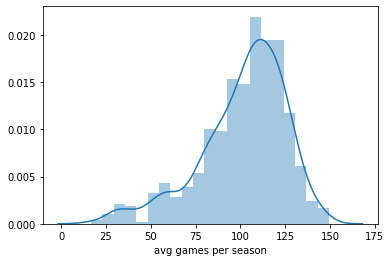

In [47]:
# Just checking the distribution of some of our engineered features.

import seaborn as sns

sns.distplot(hof['avg games per season'])

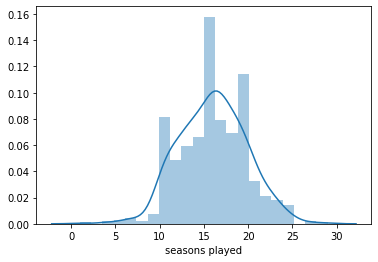

In [48]:
sns.distplot(hof['seasons played'])

In [49]:
# Bin our 'seasons played' and 'avg games per season' columns to make them categorical.

hof['seasons played bins'] = pd.cut(hof['seasons played'], bins=[-1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 40], 
                                    labels=['10 or less', 11, 12, 13, 14, 15, 16, 17, 18, 19, '20+'])

hof = hof.drop(columns = 'seasons played')

In [50]:
# Bin our 'average games played per season' column to make it categorical.

hof['avg games per season'] = pd.cut(hof['avg games per season'], bins = [-1, 75, 80, 95, 110, 125, 140, 155, 180 ],
                                     labels = ['0-75', '76-80', '81-95', '96-110', '111-125', '126-140', '141-155', '155+'])

In [51]:
# Our data is ready to begin modeling.  We have clean data with no missing values, a mix of categorical
# and numeric variables, and enought data to train on.  Freakin awesome.

hof.head()

playerID  yearid  ... avg games per season  seasons played bins
0   cobbty01    1936  ...              126-140                  20+
1   ruthba01    1936  ...              111-125                  20+
2  wagneho01    1936  ...              126-140                  20+
5  lajoina01    1936  ...              111-125                  20+
6  speaktr01    1936  ...              126-140                  20+

[5 rows x 15 columns]

In [52]:
###########################################################################################################################################

In [53]:
#---------------------- Start Modeling ---------------------#

In [54]:
##############################################################################################################################################

In [217]:
# Lets import a bunch / re-import a bunch of stuff we know we are going to need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install category_encoders
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans 
!pip install pdpbox
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif, SelectKBest

In [181]:
# Lets make a basic pipeline to see what we can do with a first model.

train, val = train_test_split(hof, test_size = .32, stratify=hof['inducted'], random_state=42)
val, test = train_test_split(val, test_size = .3, stratify=val['inducted'], random_state=42)

target = 'inducted'

xtrain = train.drop(columns=[target, 'playerID', 'yearid'])
ytrain = train[target]
ytrain = ytrain.replace({'Y':1, 'N':0})

xval = val.drop(columns=[target, 'playerID', 'yearid'])
yval = val[target]
yval = yval.replace({'Y':1, 'N':0})

xtest = test.drop(columns=[target, 'playerID', 'yearid'])
ytrue = test[target]
ytrue = ytrue.replace({'Y':1, 'N':0})


In [182]:
# Create our encoded and transformed data for future use

encoder = ce.OrdinalEncoder()
imputer = SimpleImputer(strategy='mean')

xtrain_encoded = encoder.fit_transform(xtrain)
xtrain_transformed = imputer.fit_transform(xtrain_encoded)

xval_encoded = encoder.fit_transform(xval)
xval_transformed = imputer.fit_transform(xval_encoded)

xtest_encoded = encoder.fit_transform(xtest)
xtest_transformed = imputer.fit_transform(xtest_encoded)

In [183]:
# Check shapes

train.shape, val.shape, test.shape

((524, 15), (172, 15), (75, 15))

In [223]:
# Fit a logistic regression model

scaler = StandardScaler()
reg_model = LogisticRegression(random_state=42)

xtrain_scaled = scaler.fit_transform(xtrain_transformed)
xval_scaled = scaler.fit_transform(xval_transformed)
xtest_scaled = scaler.fit_transform(xtest_transformed)

reg_model.fit(xtrain_scaled, ytrain)
reg_model_pred = reg_model.predict(xval_scaled)

reg_accuracy = accuracy_score(yval, reg_model_pred)
reg_precision = precision_score(yval, reg_model_pred)
reg_recall = recall_score(yval, reg_model_pred)
reg_f1 = f1_score(yval, reg_model_pred)

reg_accuracy, reg_precision, reg_recall, reg_f1

(0.9709302325581395, 0.8, 0.5, 0.6153846153846154)

In [224]:
reg_model_test_pred = reg_model.predict(xtest_scaled)

test_reg_accuracy = accuracy_score(ytrue, reg_model_test_pred)
test_reg_precision = precision_score(ytrue, reg_model_test_pred)
test_reg_recall = recall_score(ytrue, reg_model_test_pred)
test_reg_f1 = f1_score(ytrue, reg_model_test_pred)

test_reg_accuracy, test_reg_precision, test_reg_recall, test_reg_f1

(0.96, 0.5, 0.3333333333333333, 0.4)

In [ ]:
# Out of the box random forest for comparison on tuning.

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(class_weight={0:1, 1:3})
)

In [184]:
# Get a cv_score for our first model

cv_score = cross_val_score(pipeline, xtrain, ytrain, cv=5, scoring='precision')

np.mean(cv_score), cv_score

(0.7366666666666667,
 array([1.        , 0.75      , 0.33333333, 0.6       , 1.        ]))

In [185]:
# Fit pipeline to our train data

pipeline.fit(xtrain, ytrain)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['No. teams played on',
                                      'leagues played in',
                                      'avg games per season',
                                      'seasons played bins'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'No. teams played on',
                                          'data_type': dtype('O'),
                                          'mapping': 3+     1
2      2
1      3
NaN   -2
dtype: int64},
                                         {'col': 'leagues played in',
                                          'data_type': dtype('O...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight={0: 1, 1: 3},
                                        criteri

In [186]:
# Get an accuracy / precision ratings on our first models val score

# We get an accuracy that beats our baseline. Hooray!

predicted1 = pipeline.predict(xval)
accuracy1 = accuracy_score(yval, predicted1)
precision1 = precision_score(yval, predicted1)
recall1 = recall_score(yval, predicted1)
f11 = f1_score(yval, predicted1)

print(f'First model accuracy : {accuracy1}.'),
print(f'First model precision : {precision1}.'),
print(f'First model recall : {recall1}.'),
print(f'First model f1 : {f11}.')

First model accuracy : 0.9767441860465116.
First model precision : 0.75.
First model recall : 0.75.
First model f1 : 0.75.


In [187]:
# Get a predicted probability with custom threshold.  We
# will use this to derive our accuracy, precision, and recall
# scores from our first model.

# Our precision is really good also considering the small amount of positive
# observations.  This is the main metric we will be using to drive our model.
# In the context of making a sports betting model, we only wany to put money
# down if we are very sure it is a win.  With this model, we could feel more combfortable
# betting on an 'N' than wth baseline, which was already very high.  I also wouldn't be too
# afraid of putting money on a positive prediction...as long as the return was 1.25

threshold = .5

predicted_proba = pipeline.predict_proba(xval)
predicted = (predicted_proba [:,1] >= threshold).astype('int')
precision = precision_score(yval, predicted)
recall = recall_score(yval, predicted)
f1 = f1_score(yval, predicted)
precision, recall, f1

(0.75, 0.75, 0.75)

In [188]:
# Check permutation importances


permuter = PermutationImportance (
    pipeline.named_steps['randomforestclassifier'],
    scoring='precision',
    n_iter=5,
    random_state=42
)

permuter.fit(xval_transformed, yval)
feature_names = xval.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

career RBIs             2.166667e-01
career_hits             6.666667e-03
leagues played in       0.000000e+00
No. teams played on     0.000000e+00
HRs per season         -2.220446e-17
career_average         -4.285714e-02
seasons played bins    -6.333333e-02
avg games per season   -7.619048e-02
career slugging pct    -8.333333e-02
hits_per_season        -8.809524e-02
RBIs per season        -9.285714e-02
career HRs             -2.500000e-01
dtype: float64

In [189]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

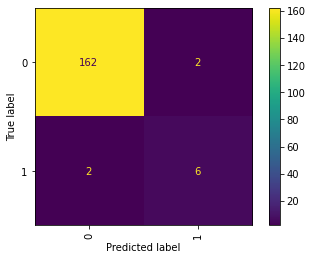

In [190]:
# Lets look at a confusion matrix

plot_confusion_matrix(pipeline, xval, yval, values_format='.0f', xticks_rotation = 'vertical')
plt.savefig("build_project_2_vis_1.jpg")

In [191]:
############ Import SMOTE ########################################################

from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy=.5, k_neighbors=2, random_state=42)

In [192]:
# SMOTE to balance class distribution.
# set up our new arrays as dataframes

xtrain_res, ytrain_res = oversample.fit_resample(xtrain_transformed, ytrain)
xtrain_res.shape, ytrain_res.shape

((750, 12), (750,))

In [193]:
# Create resampled dataframe for x train

xtrain_res = pd.DataFrame(xtrain_res)
xtrain_res.columns = xtrain.columns
xtrain_res.reset_index(inplace=True)
xtrain_res.drop(columns='index', inplace=True)

In [194]:
# Set up resampled train target dataframe

ytrain_res = pd.DataFrame(ytrain_res)


In [195]:
# Check our target distribution

ytrain_res[0].value_counts(normalize=True)

0    0.666667
1    0.333333
Name: 0, dtype: float64

In [196]:
len(xtrain_res), len(ytrain_res)

(750, 750)

In [197]:
# Define pipeline for use with SMOTE data

pipeline2 = make_pipeline(
    encoder,
    SimpleImputer(strategy='mean'),
    RandomForestClassifier()
)

In [198]:
# Tune Hyperameters for our second model

#param_grid = {
#   'randomforestclassifier__max_depth': range(0,8),
#   'randomforestclassifier__min_samples_leaf': range(0,10),
#   'randomforestclassifier__min_samples_split': range(0,10)
#}

#search = GridSearchCV(
#   estimator = pipeline2,
#   param_grid = param_grid,
#   scoring = 'precision',
#   n_jobs=-1,
#   verbose=3,
#   cv=5
#)

#search = search.fit(xtrain_res, ytrain_res)

In [199]:
#search.best_params_

In [200]:
# Redefine pipeline with best params.

pipeline2 = make_pipeline(
    encoder,
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=7, class_weight={0:1, 1:2})  
)

In [201]:
# Fit model to SMOTE'd data

pipeline2.fit(xtrain_res, ytrain_res)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['No. teams played on',
                                      'leagues played in',
                                      'avg games per season',
                                      'seasons played bins'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'No. teams played on',
                                          'data_type': dtype('O'),
                                          'mapping': 3+     1
2      2
1      3
NaN   -2
dtype: int64},
                                         {'col': 'leagues played in',
                                          'data_type': dtype('O...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight={0: 1, 1: 2},
                                        criteri

In [202]:
# Compare evaluation metrics for our first and second model.

threshold = .5

predicted_proba2 = pipeline2.predict_proba(xval)
predicted2 = (predicted_proba2 [:,1] >= threshold).astype('int')
accuracy2 = accuracy_score(yval, predicted2)
precision2 = precision_score(yval, predicted2)
recall2 = recall_score(yval, predicted2)
f12 = f1_score(yval, predicted2)

print(f'First model accuracy : {accuracy1}.'),
print(f'First model precision : {precision1}.'),
print(f'First model recall : {recall1}.'),
print(f'First model f1 : {f11}.'),

print(f'Second model accuracy : {accuracy2}.'),
print(f'Second model precision : {precision2}.'),
print(f'Second model recall : {recall2}.'),
print(f'Second model f1 : {f12}.')


First model accuracy : 0.9767441860465116.
First model precision : 0.75.
First model recall : 0.75.
First model f1 : 0.75.
Second model accuracy : 0.9709302325581395.
Second model precision : 0.6666666666666666.
Second model recall : 0.75.
Second model f1 : 0.7058823529411765.


In [203]:
# Lets run them on our test data...... the moment of truth

threshold = .5

test_proba1 = pipeline.predict_proba(xtest)
test_proba2 = pipeline2.predict_proba(xtest)

test_pred1 = (test_proba1[:,1] >= threshold).astype('int')
test_pred2 = (test_proba2[:,1] >= threshold).astype('int')

test_accuracy1 = accuracy_score(ytrue, test_pred1)
test_precision1 = precision_score(ytrue, test_pred1)
test_recall1 = recall_score(ytrue, test_pred1)
test_f11 = f1_score(ytrue, test_pred1)

test_accuracy2 = accuracy_score(ytrue, test_pred2)
test_precision2 = precision_score(ytrue, test_pred2)
test_recall2 = recall_score(ytrue, test_pred2)
test_f12 = f1_score(ytrue, test_pred2)

print(f'First model test accuracy : {test_accuracy1}'),
print(f'First model test precision : {test_precision1}'),
print(f'First model test recall: {test_recall1}'),
print(f'First model test f-1: {test_f11}'),

print(f'Second model test accuracy : {test_accuracy2}'),
print(f'Second model test precision : {test_precision2}'),
print(f'Second model test recall: {test_recall2}'),
print(f'Second model test f-1: {test_f12}')

First model test accuracy : 0.9333333333333333
First model test precision : 0.0
First model test recall: 0.0
First model test f-1: 0.0
Second model test accuracy : 0.96
Second model test precision : 0.5
Second model test recall: 0.6666666666666666
Second model test f-1: 0.5714285714285715


In [204]:
# Checking how many 'yes' values were in our 75 sample test set.

yes_test = []

for x in ytrue:
  if x == 1:
    yes_test.append(1)

sum(yes_test)

3

In [205]:
# In summary, we have two models.  One, that is fit to our original data and is
# more generalized, performing more consistently, and a second model trained on 
# SMOTE'd data that ended up performing better on our test data.

In [206]:
# Re-define our predicted proba for use in an ROC curve plot

pred_proba1 = pipeline.predict_proba(xval)[:,-1]
pred_proba2 = pipeline2.predict_proba(xval)[:,-1]

In [207]:
# Lets plot an AUC curve to compare our models

# Print and compare roc scores for our two models.  We expect
# Model 1 to have the best roc


auc1 = roc_auc_score(yval, pred_proba1)
auc2 = roc_auc_score(yval, pred_proba2)



print(f'First model AUC : {auc1}'),
print(f'Second model AUC : {auc2}')

First model AUC : 0.9733231707317073
Second model AUC : 0.9222560975609756


In [208]:
# Derive our tpr, frp, and thresholds for both models

fp1, tp1, thresholds1 = roc_curve(yval, pred_proba1)
fp2, tp2, thresholds2 = roc_curve(yval, pred_proba2)

auc_df1 = pd.DataFrame({
    'False Poitive Rate': fp1,
    'True Positive Rate': tp1,
    'Threshold': thresholds1
})

auc_df2 = pd.DataFrame({
    'False Poitive Rate': fp2,
    'True Positive Rate': tp2,
    'Threshold': thresholds2
})

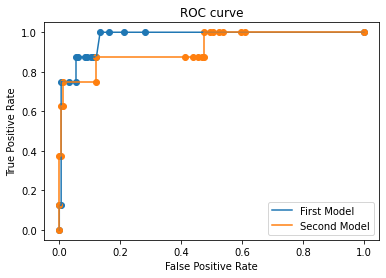

In [209]:
# Plot it out

# This curve, along with our AOC score, indicates that our pre-smote model
# is better overall model.  Our second, SMOTE'd model, requires a higher false
# positive (recall) to match our first models true positive (precision)

plt.scatter(fp1, tp1)
plt.plot(fp1, tp1)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

plt.scatter(fp2, tp2)
plt.plot(fp2, tp2);

plt.savefig("build_project_2_vis_4.jpg")

plt.legend(['First Model', 'Second Model'])

<Figure size 432x288 with 0 Axes>

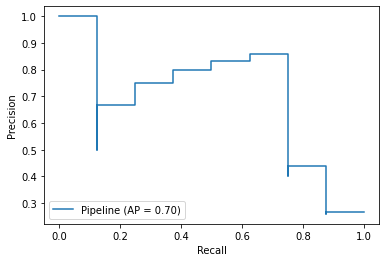

In [210]:
fig = plt.figure()

prc1 = plot_precision_recall_curve(pipeline, xval, yval)

plt.savefig("build_project_2_vis_6.jpg")

<Figure size 432x288 with 0 Axes>

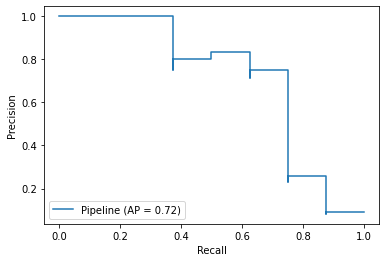

In [211]:
fig = plt.figure()

prc1 = plot_precision_recall_curve(pipeline2, xval, yval)
plt.savefig("build_project_2_vis_5.jpg")


Text(0.5, 1.0, 'Career hits distribution: SMOTE vs. pre-SMOTE data')

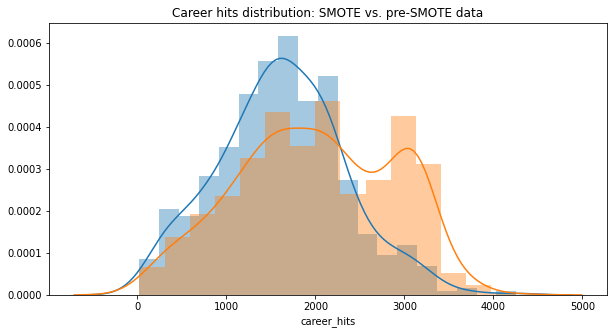

In [212]:
# Dist plot to show how SMOTE effects feature distribution

fig = plt.figure(figsize=(10,5))

sns.distplot(xtrain['career_hits'])
sns.distplot(xtrain_res['career_hits'])

plt.savefig("build_project_2_vis_3.jpg")
plt.title('Career hits distribution: SMOTE vs. pre-SMOTE data')

Text(0.5, 1.0, 'Career Home Runs distribution: SMOTE vs. pre-SMOTE data')

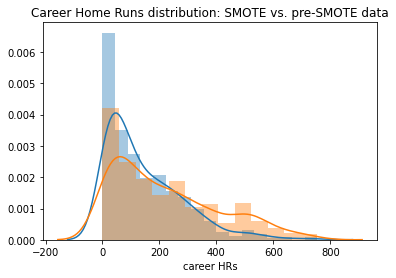

In [213]:
sns.distplot(xtrain['career HRs'])
sns.distplot(xtrain_res['career HRs'])

plt.title('Career Home Runs distribution: SMOTE vs. pre-SMOTE data')

In [214]:
# Get a visualization from each of our forests for comparison

estimator = pipeline.named_steps['randomforestclassifier'].estimators_[5]

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = xtrain.columns,
                class_names = ['no', 'yes'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [215]:
estimator = pipeline2.named_steps['randomforestclassifier'].estimators_[5]

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = xtrain.columns,
                class_names = ['no', 'yes'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')